Lambda School Data Science

*Unit 2, Sprint 1, Module 4*

---

# Module Project: Logistic Regression

Do you like burritos? 🌯 You're in luck then, because in this project you'll create a model to predict whether a burrito is `'Great'`.

The dataset for this assignment comes from [Scott Cole](https://srcole.github.io/100burritos/), a San Diego-based data scientist and burrito enthusiast. 

## Directions

The tasks for this project are the following:

- **Task 1:** Import `csv` file using `wrangle` function.
- **Task 2:** Conduct exploratory data analysis (EDA), and modify `wrangle` function .
- **Task 3:** Split data into feature matrix `X` and target vector `y`.
- **Task 4:** Split feature matrix `X` and target vector `y` into training and test sets.
- **Task 5:** Establish the baseline accuracy score for your dataset.
- **Task 6:** Build `model_logr` using a pipeline that includes three transfomers and `LogisticRegression` predictor. Train model on `X_train` and `X_test`.
- **Task 7:** Calculate the training and test accuracy score for your model.
- **Task 8:** Create a horizontal bar chart showing the 10 most influencial features for your  model. 
- **Task 9:** Demonstrate and explain the differences between `model_lr.predict()` and `model_lr.predict_proba()`.

**Note** 

You should limit yourself to the following libraries:

- `category_encoders`
- `matplotlib`
- `pandas`
- `sklearn`

In [202]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [203]:
filepath = DATA_PATH + 'burritos/burritos.csv'

In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression

# I. Wrangle Data

In [205]:
def wrangle(filepath):
    # Import w/ DateTimeIndex
    df = pd.read_csv(filepath, parse_dates=['Date'],
                     index_col='Date')
    df = df.sort_index()
    # Drop unrated burritos
    df.dropna(subset=['overall'], inplace=True)
    
    # Derive binary classification target:
    # We define a 'Great' burrito as having an
    # overall rating of 4 or higher, on a 5 point scale
    df['Great'] = (df['overall'] >= 4).astype(int)
    
    # Drop high cardinality categoricals
    df = df.drop(columns=['Notes', 'Location', 'Address', 'URL', 'Neighborhood'])
#     Fix odd dates.  who knows what else is off. 🤷
    df = df.truncate(before=pd.Timestamp('2016-01-01'))
    
    #DataFrame.truncate(before=None, after=None, axis=None, copy=True)
    
    #convert values to 1's and 0's     #make all x's true
    df.replace(to_replace="Yes",value=1,inplace=True)
    df.replace(to_replace='No',value=0,inplace=True)
    df = df.fillna(0)
    df = df.replace(['X', 'x'], 1)
    
    # I dont want to drop rare ingredients because it might just be they are key to high ratings.
    rarities = [col for col in df.select_dtypes('int').columns if df[col].sum() < (421*.02)]
    print(rarities) # ['NonSD', 'Fish', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Salsa.1', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Corn', 'Zucchini']
    #df.drop(columns= rarities, inplace=True)
    
    # Queso is a float
    df.Queso = df.Queso.astype(int)
    
    return df

**Task 1:** Use the above `wrangle` function to import the `burritos.csv` file into a DataFrame named `df`.

In [206]:
#filepath = DATA_PATH + 'burritos/burritos.csv'
df = wrangle(filepath)

['NonSD', 'Fish', 'Tomato', 'Bell peper', 'Carrots', 'Cabbage', 'Salsa.1', 'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster', 'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Corn', 'Zucchini']


In [207]:
df['overall'].head()  # Press ctrl + / to comment/uncomment a block of selected code or a single unselected line.
# Date
# 2011-05-16    2.00
# 2015-04-20    4.80
# 2016-01-18    3.80
# 2016-01-24    3.75
# 2016-01-24    3.00
# Name: overall, dtype: float64

# Date
# 2016-01-18    3.80
# 2016-01-24    3.75
# 2016-01-24    3.00
# 2016-01-24    3.00
# 2016-01-27    4.20
# Name: overall, dtype: float64

# Fixed odd dates.  They could have been entry mistakes but I dont know that.

Date
2016-01-18    3.80
2016-01-24    3.75
2016-01-24    3.00
2016-01-24    3.00
2016-01-27    4.20
Name: overall, dtype: float64

In [208]:
#c# df['avg_rating'] = (df.Yelp + df.Google)/2
# df.avg_rating #.round(0)
# df.columns
#># Index(['Burrito', 'Yelp', 'Google', 'Chips', 'Cost', 'Hunger', 'Mass (g)',
#        'Density (g/mL)', 'Length', 'Circum', 'Volume', 'Tortilla', 'Temp',
#        'Meat', 'Fillings', 'Meat:filling', 'Uniformity', 'Salsa', 'Synergy',
#        'Wrap', 'overall', 'Rec', 'Reviewer', 'Unreliable', 'NonSD', 'Beef',
#        'Pico', 'Guac', 'Cheese', 'Fries', 'Sour cream', 'Pork', 'Chicken',
#        'Shrimp', 'Fish', 'Rice', 'Beans', 'Lettuce', 'Tomato', 'Bell peper',
#        'Carrots', 'Cabbage', 'Sauce', 'Salsa.1', 'Cilantro', 'Onion',
#        'Taquito', 'Pineapple', 'Ham', 'Chile relleno', 'Nopales', 'Lobster',
#        'Queso', 'Egg', 'Mushroom', 'Bacon', 'Sushi', 'Avocado', 'Corn',
#        'Zucchini', 'Great', 'avg_rating'],
#       dtype='object')
# df['NonSD'].sum()

In [209]:
# df['Synergy']

In [210]:
#df['Cheese'].sum() #159
#c# objCol = df.select_dtypes('float64').columns
# objCol
#># Index(['Yelp', 'Google', 'Cost', 'Hunger', 'Mass (g)', 'Density (g/mL)',
#        'Length', 'Circum', 'Volume', 'Tortilla', 'Temp', 'Meat', 'Fillings',
#        'Meat:filling', 'Uniformity', 'Salsa', 'Synergy', 'Wrap', 'overall',
#        'avg_rating'],
#       dtype='object')

#c# df.dtypes.unique


In [211]:
df.head()

,Burrito,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,...,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini,Great
Date,,,,,,,,,,,,,,,,,,,,,
2016-01-18,California,3.5,4.2,0,6.49,3.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,Carne asada,0.0,0.0,0,5.25,2.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,Carnitas,0.0,0.0,0,4.85,1.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2016-01-24,California,3.5,3.3,0,5.45,3.5,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2016-01-27,California,4.0,3.8,1,6.59,4.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [215]:
#df.Volume

In [214]:
#df['Beef'].head()

During your exploratory data analysis, note that there are several columns whose data type is `object` but that seem to be a binary encoding. For example, `df['Beef'].head()` returns:

```
0      x
1      x
2    NaN
3      x
4      x
Name: Beef, dtype: object
```

**Task 2:** Change the `wrangle` function so that these columns are properly encoded as `0` and `1`s. Be sure your code handles upper- and lowercase `X`s, and `NaN`s.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

If you explore the `'Burrito'` column of `df`, you'll notice that it's a high-cardinality categorical feature. You'll also notice that there's a lot of overlap between the categories. 

**Stretch Goal:** Change the `wrangle` function above so that it engineers four new features: `'california'`, `'asada'`, `'surf'`, and `'carnitas'`. Each row should have a `1` or `0` based on the text information in the `'Burrito'` column. For example, here's how the first 5 rows of the dataset would look.

| **Burrito** | **california** | **asada** | **surf** | **carnitas** |
| :---------- | :------------: | :-------: | :------: | :----------: |
| California  |       1        |     0     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |
|  Carnitas   |       0        |     0     |    0     |      1       |
| Carne asada |       0        |     1     |    0     |      0       |
| California  |       1        |     0     |    0     |      0       |

**Note:** Be sure to also drop the `'Burrito'` once you've engineered your new features.

In [ ]:
# Conduct your exploratory data analysis here
# And modify the `wrangle` function above.

In [216]:
#df.Burrito.head()

In [217]:
#df.Queso.head()

In [218]:
#df.value_counts # [421 rows x 59 columns]>

In [219]:
#df.Burrito.value_counts()
#n# First run: Name: Burrito, Length: 132, dtype: int64

In [220]:
#df.info()

# II. Split Data

**Task 3:** Split your dataset into the feature matrix `X` and the target vector `y`. You want to predict `'Great'`.

In [223]:
target= 'Great'

X = df.drop(columns=target)
y = df[target]

**Task 4:** Split `X` and `y` into a training set (`X_train`, `y_train`) and a test set (`X_test`, `y_test`).

- Your training set should include data from 2016 through 2017. 
- Your test set should include data from 2018 and later.

In [222]:
print(df.index.year.min()) #2011 <- I removed 2 odd dates to fix this
print(df.index.year.max()) # 2016

2016
2026


In [221]:
#df['old'] = (df.index.year < 2016) # messing around. returns bool vals
#df['old'].head()

In [224]:
max_train = 2017
min_test = 2018
mask_train = (X.index.year <= max_train)# & (X.index.year < range_test) # dont need because I 'fixed' the index
mask_test = (X.index.year >= min_test)

X_train, y_train = X.loc[mask_train], y.loc[mask_train]
X_test, y_test = X.loc[mask_test], y.loc[mask_test]

In [226]:
y.shape, X.shape

((419,), (419, 60))

In [232]:
# X_train.shape #(381, 60)
#X_test.shape #(38, 60)
#X_train.head()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((381, 60), (381,), (38, 60), (38,))

# III. Establish Baseline

**Task 5:** Since this is a **classification** problem, you should establish a baseline accuracy score. Figure out what is the majority class in `y_train` and what percentage of your training observations it represents. 

In [241]:
baseline_acc = y_train.value_counts(normalize=True).max()
print('Baseline Accuracy Score:', baseline_acc)

Baseline Accuracy Score: 0.5826771653543307


# IV. Build Model

**Task 6:** Build a `Pipeline` named `model_logr`, and fit it to your training data. Your pipeline should include:

- a `OneHotEncoder` transformer for categorical features, 
- a `SimpleImputer` transformer to deal with missing values, 
- a [`StandarScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) transfomer (which often improves performance in a logistic regression model), and 
- a `LogisticRegression` predictor.

In [246]:
model_logr = make_pipeline(OneHotEncoder(use_cat_names=True),
                           SimpleImputer(strategy='mean'),
                           StandardScaler(),
                           LogisticRegression() )
model_logr.fit(X_train, y_train)

c:\python39\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Burrito', 'Rec', 'Reviewer'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [250]:
print('New Accuracy', model_logr.score(X_train, y_train))

New Accuracy 0.9973753280839895


# IV. Check Metrics

**Task 7:** Calculate the training and test accuracy score for `model_lr`.

In [251]:
training_acc = model_logr.score(X_train, y_train)
test_acc = model_logr.score(X_test, y_test)

print('Training MAE:', training_acc)
print('Test MAE:', test_acc)

Training MAE: 0.9973753280839895
Test MAE: 0.8157894736842105


# V. Communicate Results

**Task 8:** Create a horizontal barchart that plots the 10 most important coefficients for `model_lr`, sorted by absolute value.

**Note:** Since you created your model using a `Pipeline`, you'll need to use the [`named_steps`](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) attribute to access the coefficients in your `LogisticRegression` predictor. Be sure to look at the shape of the coefficients array before you combine it with the feature names.

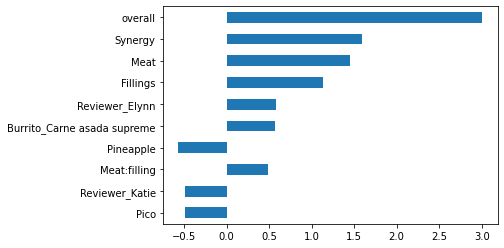

In [252]:
# Create your horizontal barchart here.
coefficients = model_logr.named_steps['logisticregression'].coef_[0]
features = model_logr.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients, index=features).sort_values(key=abs)
feat_imp.tail(10).plot(kind='barh');

There is more than one way to generate predictions with `model_lr`. For instance, you can use [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression) or [`predict_proba`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression.predict_proba).

**Task 9:** Generate predictions for `X_test` using both `predict` and `predict_proba`. Then below, write a summary of the differences in the output for these two methods. You should answer the following questions:

- What data type do `predict` and `predict_proba` output?
- What are the shapes of their different output?
- What numerical values are in the output?
- What do those numerical values represent?

In [253]:
# Write code here to explore the differences between `predict` and `predict_proba`.
y_pred = model_logr.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [259]:
np.set_printoptions(suppress=True)
y_pred_prob = model_logr.predict_proba(X_test)
y_pred_prob

array([[0.02429371, 0.97570629],
       [0.99989866, 0.00010134],
       [0.99698264, 0.00301736],
       [0.00000255, 0.99999745],
       [0.90329992, 0.09670008],
       [0.0053384 , 0.9946616 ],
       [0.00098913, 0.99901087],
       [0.0252389 , 0.9747611 ],
       [0.18169869, 0.81830131],
       [0.92221817, 0.07778183],
       [0.97054522, 0.02945478],
       [0.96932463, 0.03067537],
       [0.18692796, 0.81307204],
       [0.02543154, 0.97456846],
       [0.56057142, 0.43942858],
       [0.13711954, 0.86288046],
       [0.99999774, 0.00000226],
       [0.99948719, 0.00051281],
       [0.99916089, 0.00083911],
       [0.93786338, 0.06213662],
       [0.00063882, 0.99936118],
       [0.97124696, 0.02875304],
       [0.01662236, 0.98337764],
       [0.93279665, 0.06720335],
       [0.99353454, 0.00646546],
       [0.99998443, 0.00001557],
       [0.00001501, 0.99998499],
       [0.04192722, 0.95807278],
       [0.94059516, 0.05940484],
       [0.68427892, 0.31572108],
       [0.

In [258]:
y_pred_prob = model_logr.predict_proba(X_test)[:,1]
y_pred_prob

array([0.97570629, 0.00010134, 0.00301736, 0.99999745, 0.09670008,
       0.9946616 , 0.99901087, 0.9747611 , 0.81830131, 0.07778183,
       0.02945478, 0.03067537, 0.81307204, 0.97456846, 0.43942858,
       0.86288046, 0.00000226, 0.00051281, 0.00083911, 0.06213662,
       0.99936118, 0.02875304, 0.98337764, 0.06720335, 0.00646546,
       0.00001557, 0.99998499, 0.95807278, 0.05940484, 0.31572108,
       0.00006581, 0.99024619, 0.99904828, 0.04640433, 0.99963959,
       0.94715931, 0.99837535, 0.99997726])

**Give your written answer here:**

The difference between ***predict** and predict_proba is that predict will give you output like 0,1. Whereas predict_proba will give you the probability value of y being 0 or 1.

`model_logr.predict(X_test)`
`array([1, 0, 0,...)`
       
***predict_proba** gives you the probabilities for the target in array form. The number of probabilities for each row is equal to the number of categories the in target variable.  Since this is binary its 2.  1 or 0.

`model_logr.predict_proba(X_test)`

`array([[0.02429371, 0.97570629],
       [0.99989866, 0.00010134],
       [0.99698264, 0.00301736],...])`

The first # in each row is the probability that the output will be 0 and second is the probability of output being 1.

If you only want the probability of getting the output either as 0 or 1, thereby getting only one result per category you can use the following code:

`model_logr.predict_proba(X_test)[:,1]`  
`#array([0.97570629, 0.00010134, 0.00301736,...])`

Here, model_logr is the trained model. X_test is the dataset we made predictions for.

Using [:,1] in the code will give you the probabilities of getting the output as 1. If you replace 1 with 0 in the above code, you will only get the probabilities of getting the output as 0.]]

Now where to use predict and predict_proba.
Predict can be used normally to get prediction values.

But suppose you are working on cancer diagnosis problem and you want to be very sure with your results. So in that case you can use predict_proba which will give you class probability values and you can set some threshold like if predict_proba_value > .98 return class 1 else 0. So basically with the help of predit_proba we can set threshold as per our needs.